# **Лабораторная №1**
## *Вариант 11*

In [ ]:
N = 11
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Social_Media'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

df = pd.read_csv('teen_phone_addiction_dataset.csv')

target_column = 'Time_on_Social_Media'
data = df[target_column]
data

,Time_on_Social_Media
0,3.6
1,1.1
2,0.3
3,3.1
4,2.6
...,...
2995,2.7
2996,3.1
2997,2.4
2998,1.7


Среднее

In [ ]:
mean_manual = sum(data) / len(data)
mean_manual

2.499233333333333

In [ ]:
np.mean(data)

np.float64(2.4992333333333336)

Дисперсия

In [ ]:
variance_manual = sum((x - mean_manual)**2 for x in data) / len(data)
variance_manual

0.9762160788888888

In [ ]:
np.var(data)

0.9762160788888898

Мода

In [ ]:
values, counts = np.unique(data, return_counts=True)
mode_manual = np.mean(values[np.argmax(counts)])
mode_manual

np.float64(2.7)

In [ ]:
stats.mode(data)

ModeResult(mode=np.float64(2.7), count=np.int64(127))

Медиана(0.5 квантиль)

In [ ]:
sorted_data = np.sort(data)
n = len(sorted_data)

if n % 2 == 0:
    median_manual = (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
else:
    median_manual = sorted_data[n//2]
median_manual

np.float64(2.5)

In [ ]:
 np.median(data)

np.float64(2.5)

Квантили

In [ ]:
def manual_quantile(data, q):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    lower = int(np.floor((n - 1) * q))
    upper = lower + 1

    if upper > q * n:
        return sorted_data[lower]
    elif upper == q * n:
        return (sorted_data[lower] + sorted_data[upper]) / 2
    return sorted_data[upper]
q25_manual = manual_quantile(data, 0.25)
q25_manual

np.float64(1.8)

In [ ]:
np.percentile(data, 25)

np.float64(1.8)

In [ ]:
q50_manual = manual_quantile(data, 0.5)
q50_manual

np.float64(2.5)

In [ ]:
np.percentile(data, 50)

np.float64(2.5)

In [ ]:
q75_manual = manual_quantile(data, 0.75)

In [ ]:
q75_manual

np.float64(3.2)

In [ ]:
np.percentile(data, 75)

np.float64(3.2)

Ассиметрия

In [ ]:
def manual_skewness(data):
    n = len(data)
    mean = sum(data) / n
    std = np.sqrt(sum((x - mean)**2 for x in data) / (n - 1))
    skew = (sum((x - mean)**3 for x in data) / n) / (std**3)
    return skew

skew_manual = manual_skewness(data)
skew_manual

np.float64(0.06690603293809835)

In [ ]:
stats.skew(data)

np.float64(0.06693949989874558)

Эксцесс

In [ ]:
def manual_kurtosis(data):
    n = len(data)
    mean = sum(data) / n
    std = (sum((x - mean)**2 for x in data) / (n - 1))**0.5
    kurt = (sum((x - mean)**4 for x in data) / n) / (std**4) - 3
    return kurt

kurt_manual = manual_kurtosis(data)
kurt_manual

-0.21673035375193406

In [ ]:
stats.kurtosis(data)

np.float64(-0.21487391248537868)

Интерквартильный размах

In [ ]:
iqr_manual = q75_manual - q25_manual
iqr_manual

np.float64(1.4000000000000001)

In [ ]:
np.percentile(data, 75) - np.percentile(data, 25)

np.float64(1.4000000000000001)

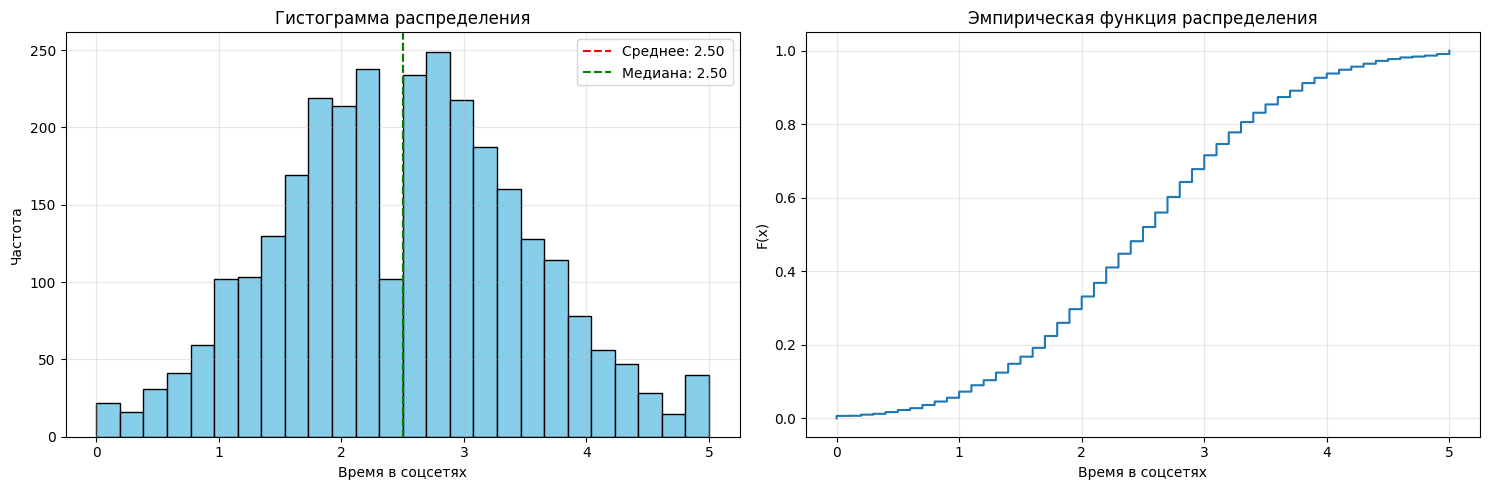

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Гистограмма
ax1.hist(data, bins='auto', color='skyblue', edgecolor='black')
ax1.axvline(mean_manual, color='red', linestyle='--', label=f'Среднее: {mean_manual:.2f}')
ax1.axvline(median_manual, color='green', linestyle='--', label=f'Медиана: {median_manual:.2f}')
ax1.set_xlabel('Время в соцсетях')
ax1.set_ylabel('Частота')
ax1.set_title('Гистограмма распределения')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Эмпирическая функция распределения
x = np.sort(data)
y = np.arange(1, len(x) + 1) / len(x)
ax2.step(x, y, where='post')
ax2.set_xlabel('Время в соцсетях')
ax2.set_ylabel('F(x)')
ax2.set_title('Эмпирическая функция распределения')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
def manual_chi2_normality_test(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)

    k = int(1 + 3.322 * math.log10(n))

    # Теоретические вероятности для нормального распределения
    observed, bins = np.histogram(data, bins=k, density=False)

    # Ожидаемые частоты
    expected = []
    for i in range(len(bins)-1):
        prob = (stats.norm.cdf(bins[i+1], mean, std) -
                stats.norm.cdf(bins[i], mean, std))
        expected.append(prob * n)

    # Критерий хи-квадрат
    chi2_stat = 0
    for obs, exp in zip(observed, expected):
        if exp > 0:
            chi2_stat += (obs - exp)**2 / exp

    # Степени свободы: k - 3 (параметры: mean, std, общее количество)
    df = k - 3
    critical_value = stats.chi2.ppf(1 - alpha, df)

    p_value = 1 - stats.chi2.cdf(chi2_stat, df)

    return chi2_stat, critical_value, p_value, df

chi2_stat, critical_value, p_value, df = manual_chi2_normality_test(data)
print(f"Критерий хи-квадрат: {chi2_stat:.4f}")
print(f"Критическое значение (α=0.05, df={df}): {critical_value:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Вывод: {'Нормальность отвергается' if p_value < 0.05 else 'Нормальность не отвергается'}")

Критерий хи-квадрат: 68.8569
Критическое значение (α=0.05, df=9): 16.9190
p-value: 0.0000
Вывод: Нормальность отвергается


In [ ]:
def asymmetry_excess_test(data, alpha=0.05):
    n = len(data)
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)

    # Стандартные ошибки
    se_skew = math.sqrt(6 / n)
    se_kurt = math.sqrt(24 / n)

    # Z-статистики
    z_skew = skew / se_skew
    z_kurt = kurt / se_kurt

    # Критические значения
    z_critical = stats.norm.ppf(1 - alpha/2)

    p_skew = 2 * (1 - stats.norm.cdf(abs(z_skew)))
    p_kurt = 2 * (1 - stats.norm.cdf(abs(z_kurt)))

    return z_skew, z_kurt, z_critical, p_skew, p_kurt

z_skew, z_kurt, z_critical, p_skew, p_kurt = asymmetry_excess_test(data)
print(f"\nКритерий асимметрии и эксцесса:")
print(f"Z-асимметрия: {z_skew:.4f}, p-value: {p_skew:.4f}")
print(f"Z-эксцесс: {z_kurt:.4f}, p-value: {p_kurt:.4f}")
print(f"Критическое Z: {z_critical:.4f}")


Критерий асимметрии и эксцесса:
Z-асимметрия: 1.4968, p-value: 0.1344
Z-эксцесс: -2.4024, p-value: 0.0163
Критическое Z: 1.9600


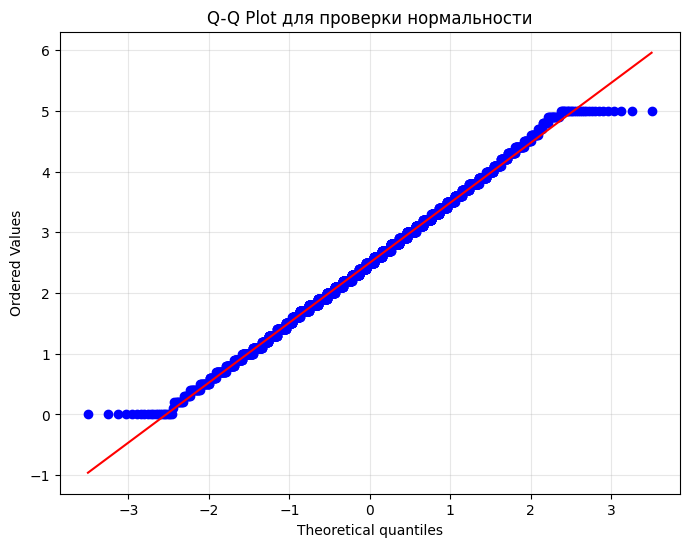

In [ ]:
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot для проверки нормальности')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Удаление выбросов по правилу 3σ
mean = np.mean(data)
std = np.std(data)
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
filtered_data1 = data[(data >= lower_bound) & (data <= upper_bound)]

# Фильтрация по 1.5IQR
q1, q3 = data.quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
filtered_data2 = data[(data >= lower) & (data <= upper)]

# Логарифмическое преобразование
log_transform =  np.log(data + 0.1)
# Стандартизация
standardized_data = (data - data.mean()) / data.std(ddof=0)


Характеристики после обработки:
Среднее: 2.4992
Медиана: 2.5000
Дисперсия: 0.9765
Асимметрия: 0.0669
Эксцесс: -0.2149

Критерий хи-квадрат для обработанных данных: 68.8569
p-value: 0.0000


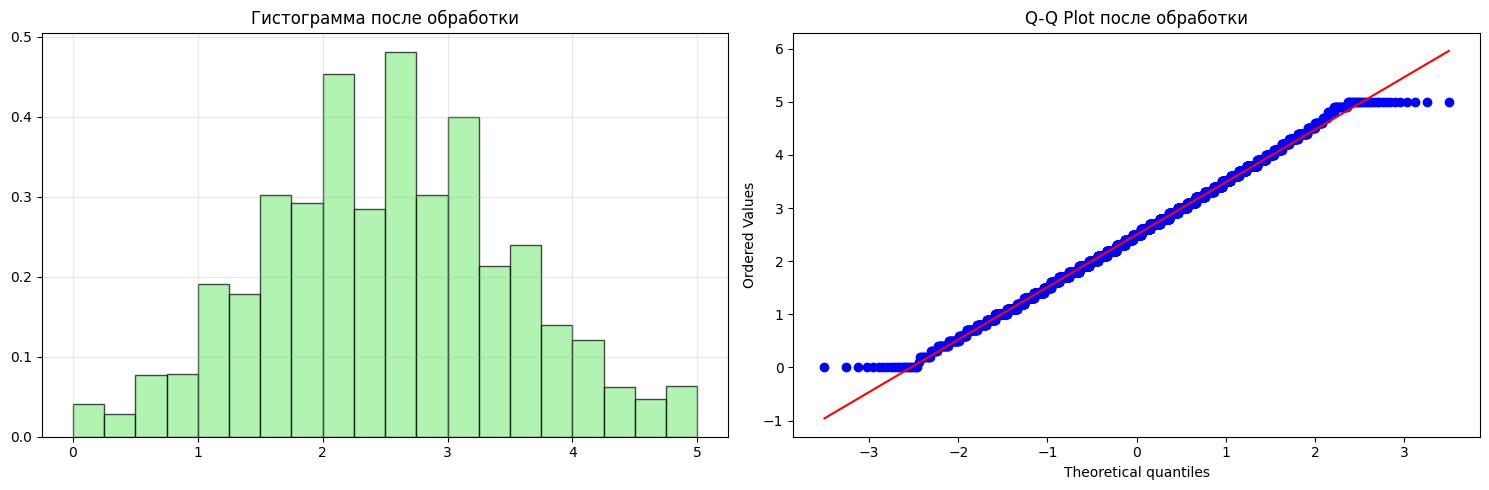


Характеристики после обработки:
Среднее: 2.4992
Медиана: 2.5000
Дисперсия: 0.9765
Асимметрия: 0.0669
Эксцесс: -0.2149

Критерий хи-квадрат для обработанных данных: 68.8569
p-value: 0.0000


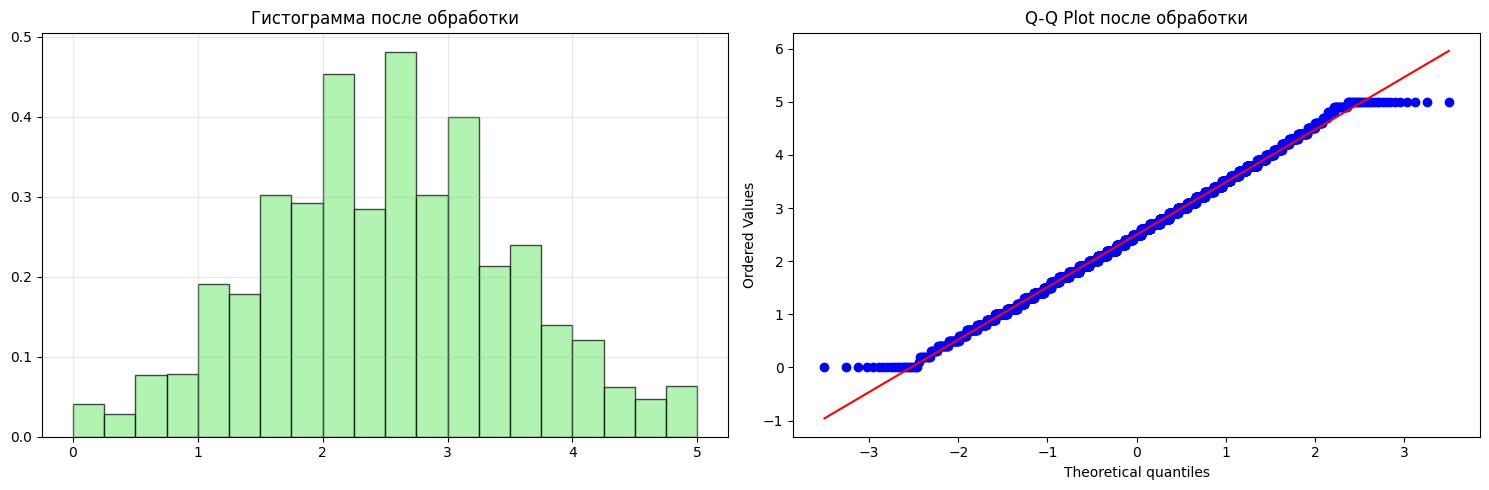


Характеристики после обработки:
Среднее: -0.0000
Медиана: 0.0008
Дисперсия: 1.0003
Асимметрия: 0.0669
Эксцесс: -0.2149

Критерий хи-квадрат для обработанных данных: 58.8362
p-value: 0.0000


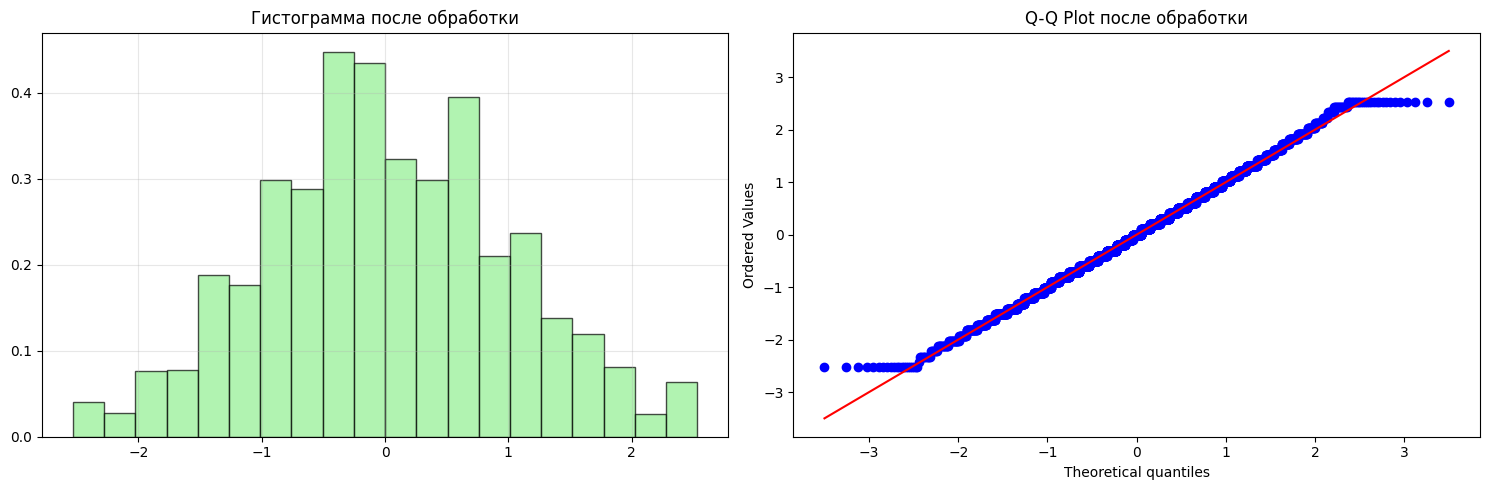


Характеристики после обработки:
Среднее: 0.8553
Медиана: 0.9555
Дисперсия: 0.2674
Асимметрия: -2.2882
Эксцесс: 9.6431

Критерий хи-квадрат для обработанных данных: 6806247.9402
p-value: 0.0000


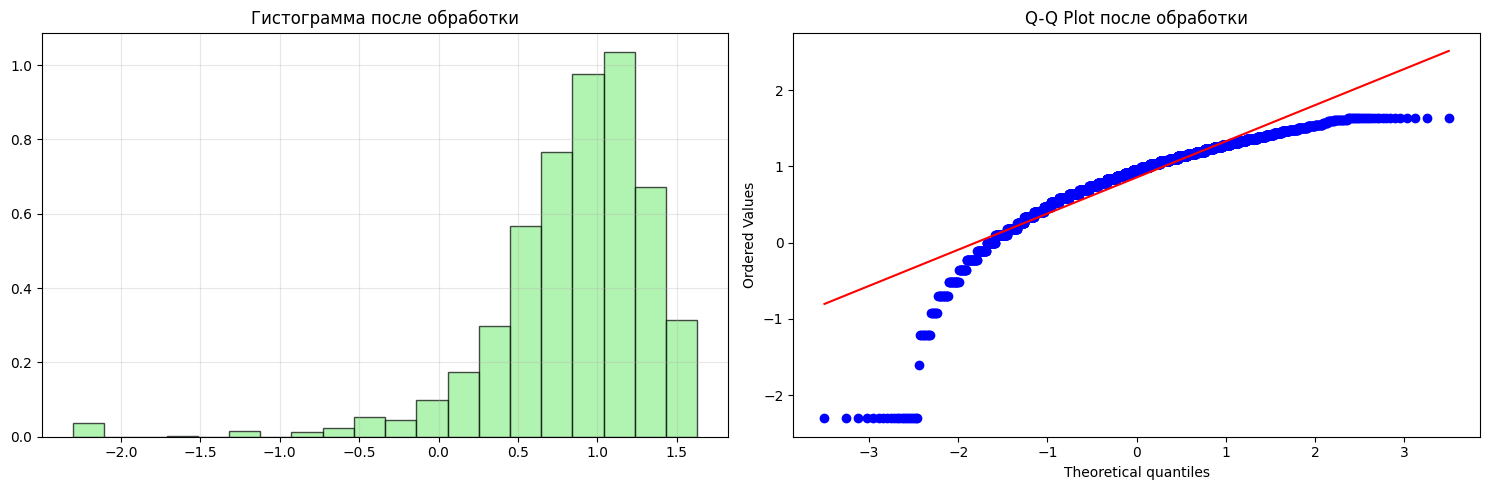

In [ ]:
def statistics(data):
  # Характеристики обработанных данных
  mean_processed = np.mean(data)
  median_processed = np.median(data)
  var_processed = data.var(ddof=1)
  skew_processed = stats.skew(data)
  kurt_processed = stats.kurtosis(data)

  print(f"\nХарактеристики после обработки:")
  print(f"Среднее: {mean_processed:.4f}")
  print(f"Медиана: {median_processed:.4f}")
  print(f"Дисперсия: {var_processed:.4f}")
  print(f"Асимметрия: {skew_processed:.4f}")
  print(f"Эксцесс: {kurt_processed:.4f}")

  # Проверка на нормальность для обработанных данных
  chi2_stat_proc, critical_value_proc, p_value_proc, df_proc = manual_chi2_normality_test(data)
  print(f"\nКритерий хи-квадрат для обработанных данных: {chi2_stat_proc:.4f}")
  print(f"p-value: {p_value_proc:.4f}")

  # Графики для обработанных данных
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
  ax1.hist(data, bins=20, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
  ax1.set_title('Гистограмма после обработки')
  ax1.grid(True, alpha=0.3)

  stats.probplot(data, dist="norm", plot=ax2)
  ax2.set_title('Q-Q Plot после обработки')
  plt.tight_layout()
  plt.show()

statistics(filtered_data1)
statistics(filtered_data2)
statistics(standardized_data)
statistics(log_transform)

In [ ]:
df = pd.read_csv('teen_phone_addiction_dataset.csv')
grouped = df.groupby('School_Grade')[target_column]

In [ ]:
grades = df['School_Grade'].unique()
n_grades = len(grades)
n_grades

6

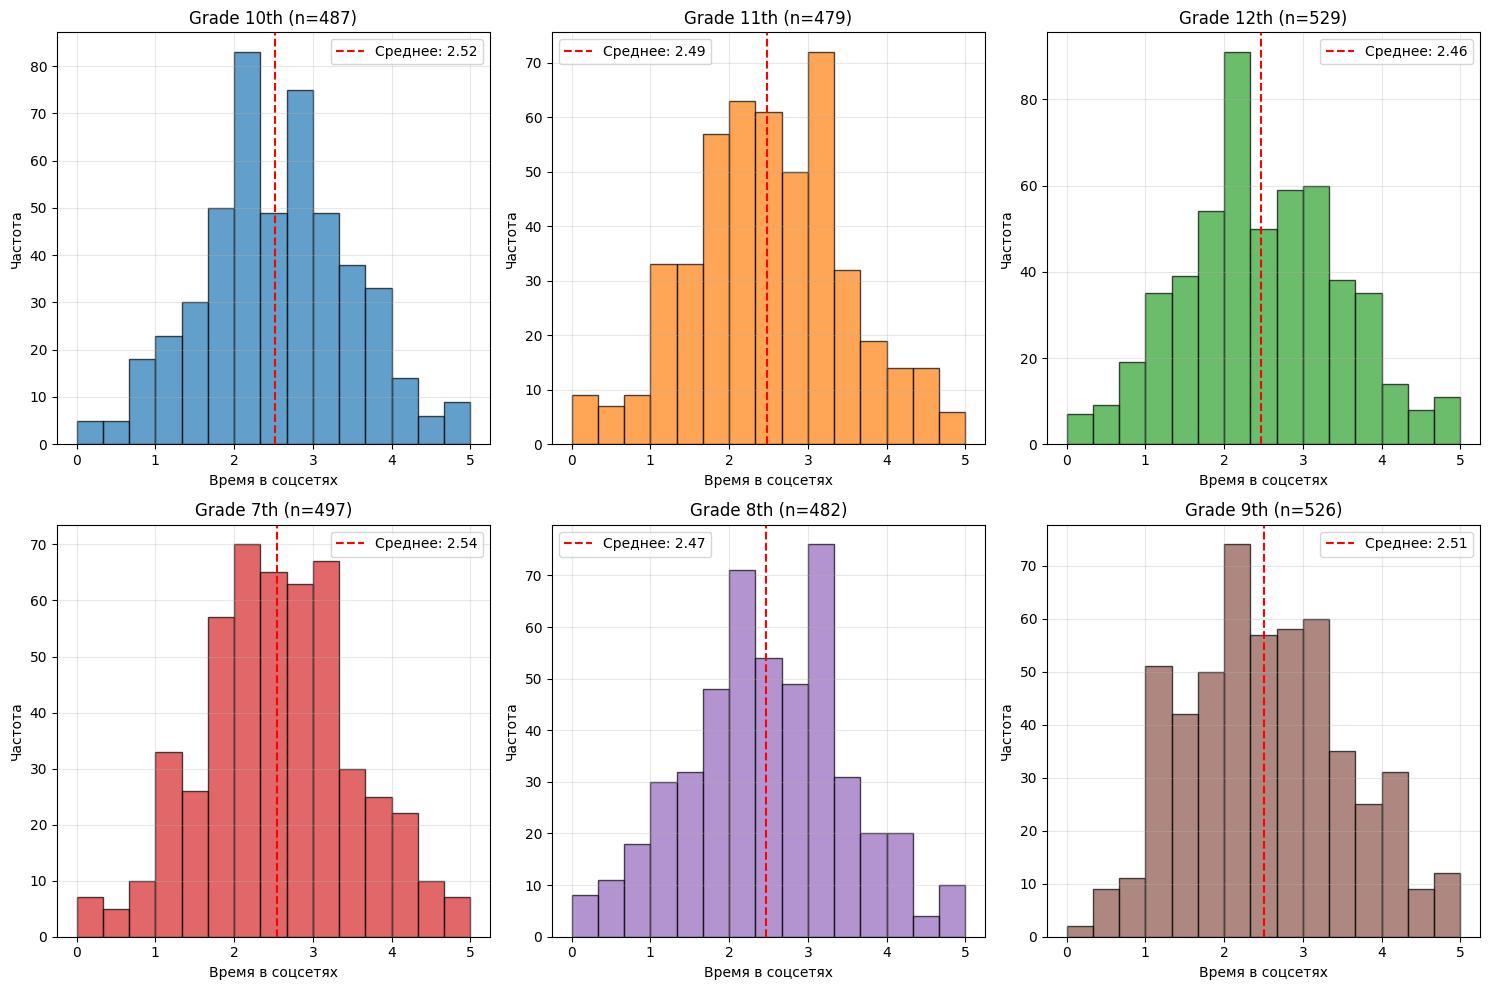


СТАТИСТИКИ ПО ГРУППАМ:
Grade 10th: n=487, mean=2.52, variance=0.92
Grade 11th: n=479, mean=2.49, variance=0.95
Grade 12th: n=529, mean=2.46, variance=1.01
Grade 7th: n=497, mean=2.54, variance=0.92
Grade 8th: n=482, mean=2.47, variance=1.03
Grade 9th: n=526, mean=2.51, variance=1.03


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, grade in enumerate(sorted(grades)):
    grade_data = grouped.get_group(grade).dropna()

    axes[i].hist(grade_data, bins=15, alpha=0.7, color=f'C{i}', edgecolor='black')
    axes[i].axvline(np.mean(grade_data), color='red', linestyle='--',
                   label=f'Среднее: {np.mean(grade_data):.2f}')
    axes[i].set_title(f'Grade {grade} (n={len(grade_data)})')
    axes[i].set_xlabel('Время в соцсетях')
    axes[i].set_ylabel('Частота')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Убираем лишние subplots
for i in range(n_grades, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Статистики по группам
print("\nСТАТИСТИКИ ПО ГРУППАМ:")
group_stats = []
for grade in sorted(grades):
    grade_data = grouped.get_group(grade).dropna()
    group_stats.append({
        'Grade': grade,
        'n': len(grade_data),
        'mean': np.mean(grade_data),
        'variance': np.var(grade_data, ddof=1),
        'std': np.std(grade_data, ddof=1)
    })
    print(f"Grade {grade}: n={len(grade_data)}, mean={np.mean(grade_data):.2f}, "
          f"variance={np.var(grade_data, ddof=1):.2f}")